# Planet
https://www.kaggle.com/c/planet-understanding-the-amazon-from-space

In [62]:
# Shell script for preparing data
# cd data
# mkdir planet
# cd planet
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f sample_submission_v2.csv.zip
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z
# kg download -u <username> -p <password> -c planet-understanding-the-amazon-from-space -f train_v2.csv.zip

# 7z x test-jpg.tar.7z
# tar xf test-jpg.tar

# 7z x test-jpg-additional.tar.7z
# tar xf test-jpg-additional.tar
# mv test-jpg-additional/* test-jpg/

# 7z x train-jpg.tar.7z
# tar xf train-jpg.tar

# unzip sample_submission_v2.zip
# unzip train_v2.csv.zip

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# Build the model

In [4]:
PATH= "data/planet/"
sz=224

Since the evaluation metric of the competition is f2, let's add it to our metrics list.

In [5]:
from planet import f2, opt_th

metrics = [f2]

We'll be using resnet34 to start with. Later, let's experiment with other pretrained nets.

In [48]:
val_idxs = get_cv_idxs(40479, cv_idx=3)

arch = resnet34
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_top_down, max_zoom=1.05)

data = ImageClassifierData.from_csv(PATH, folder="train-jpg", csv_fname=f"{PATH}train_v2.csv", val_idxs=val_idxs,
                                    bs=64, tfms=tfms, suffix=".jpg", test_name="test-jpg")
learn = ConvLearner.pretrained(arch, data, precompute=True, metrics=[f2])
learn.fit(0.01, 3)

A Jupyter Widget

[ 0.       0.17255  0.14175  0.88606]                         
[ 1.       0.1471   0.12553  0.89495]                         
[ 2.       0.13849  0.12044  0.89888]                         



Let's find an optimal lr.

In [9]:
learn = ConvLearner.pretrained(arch, data, precompute=True, metrics=[f2])
lrf = learn.lr_find()

A Jupyter Widget

[ 0.       0.21381  0.28364  0.84264]                         



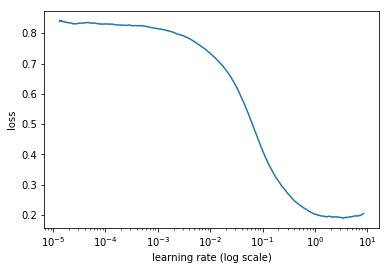

In [10]:
learn.sched.plot()

Objective is to find the maximum lr where the loss curve is significantly on a descent. That seems to be around 0.5.

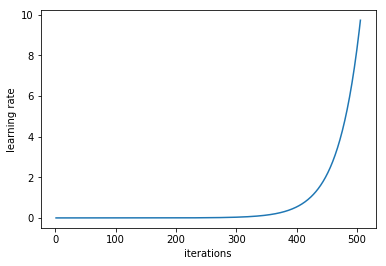

In [11]:
learn.sched.plot_lr()

In [8]:
learn = ConvLearner.pretrained(arch, data, precompute=True, metrics=[f2])
learn.fit(0.5, 3)

A Jupyter Widget

[ 0.       0.12718  0.11084  0.90717]                         
[ 1.       0.11742  0.10583  0.91087]                         
[ 2.       0.11636  0.10407  0.9116 ]                         



Process Process-96:
Process Process-93:
Process Process-75:
Process Process-91:
Process Process-74:
Process Process-78:
Process Process-95:
Process Process-94:
Process Process-77:
Process Process-89:
Traceback (most recent call last):
Process Process-92:
Process Process-76:
Process Process-79:
Process Process-80:
Process Process-90:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-73:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/en

  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/src/anaconda3/envs/fastai/l

In [10]:
learn.precompute = False

In [11]:
learn.fit(0.5, 3, cycle_len=1)

A Jupyter Widget

[ 0.       0.11702  0.10156  0.91447]                        
[ 1.       0.11557  0.10127  0.91412]                        
[ 2.       0.11415  0.10098  0.91472]                        



In [12]:
learn.save("planet_freezed")

In [13]:
learn.load("planet_freezed")

# Differential learning rates

In [53]:
learn.unfreeze()

In [15]:
learn.lr_find()

A Jupyter Widget

[ 0.       0.19937  1.75274  0.67685]                        



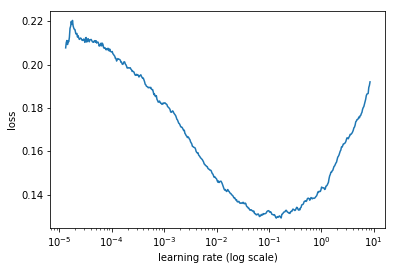

In [16]:
learn.sched.plot()

In [18]:
l = 0.1
lr = np.array([l/6, l/3, l])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget









  0%|          | 0/506 [00:00<?, ?it/s]







  1%|          | 4/506 [00:08<17:52,  2.14s/it, loss=0.0961]


Exception in thread Thread-14:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[ 0.       0.09685  0.08847  0.92694]                         
[ 1.       0.09877  0.08661  0.92843]                         
[ 2.       0.09336  0.08484  0.92977]                         
[ 3.       0.08965  0.0856   0.92942]                         
[ 4.       0.09082  0.08452  0.93   ]                         
[ 5.       0.0881   0.08282  0.93136]                         
[ 6.       0.08727  0.08258  0.93163]                         



In [21]:
learn.save("planet_unfreezed")

In [54]:
learn.load("planet_unfreezed")

# Predict on test set

In [56]:
import resource
rlimit = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (2048, rlimit[1]))

In [57]:
preds = learn.TTA(is_test=True)

This takes around 17 minutes on a p2.xlarge instance. (around 276 s/it)

In [59]:
fnames = [x.split("/")[1].split(".")[0] for x in data.test_dl.dataset.fnames]
len(fnames)

61191

In [60]:
classes = np.array(data.classes, dtype=str)
res = [" ".join(classes[np.where(pp > 0.2)]) for pp in preds[0]] 

In [61]:
final = pd.DataFrame({'image_name': fnames, 'tags': res})

f = "submit1.csv"
final.to_csv(f"{PATH}{f}", index=False)

from IPython.display import FileLink
FileLink(f"{PATH}{f}")

/home/ubuntu/fastai/courses/dl1/data/planet/submit1.csv